3. Convolutional neural network (CNN) (Any One from the following)
• Use any dataset of plant disease and design a plant disease detection system using CNN.
• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

4422102/4422102 [==============================] - 0s 0us/step


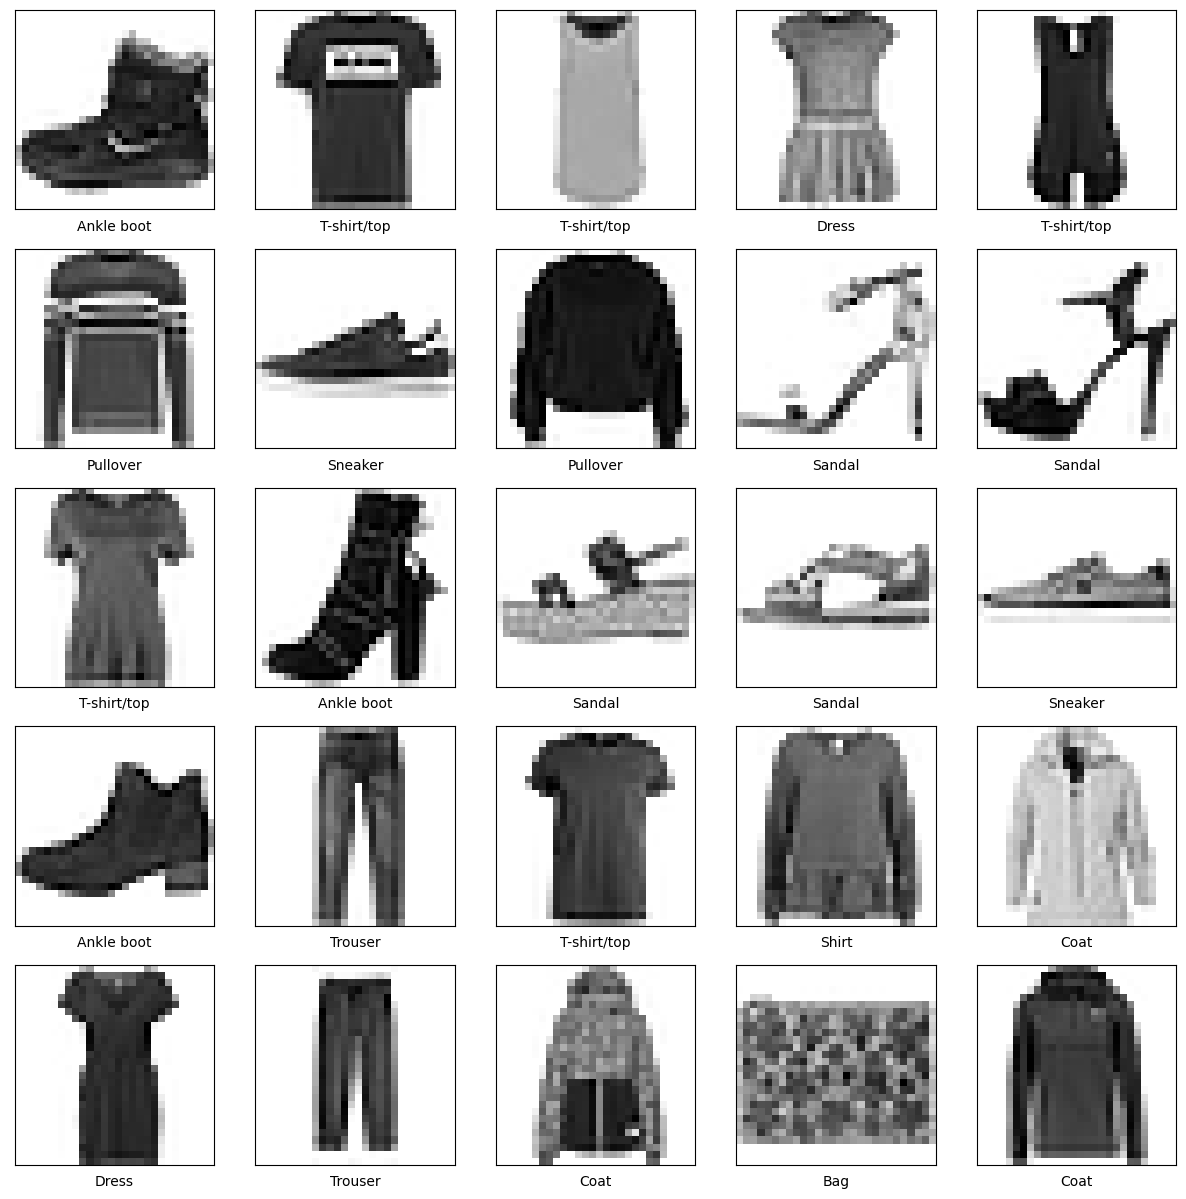

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32,  
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)


model.add(
    tf.keras.layers.Flatten()
)
model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax' 
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)


model.summary()


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


history = model.fit(
      x_train, y_train,
      batch_size=256, 
      epochs=10, 
      validation_split=0.2, 
      verbose=1) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.89      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.77      0.91      0.83      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.88      0.80      0.84      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.79      0.69      0.74      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



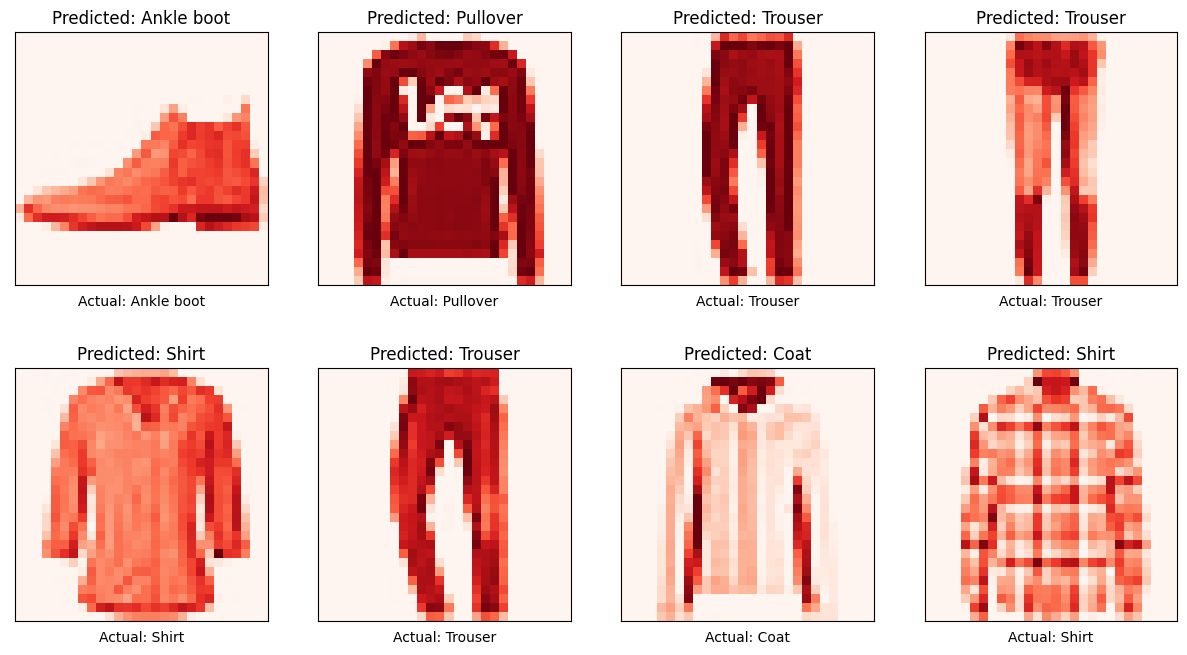

In [6]:
predicted_classes = model.predict(x_test)

y_pred = [np.argmax(predicted_classes[i]) for i in range(len(predicted_classes))]
print(classification_report(y_test, y_pred, target_names=class_names))

correct = np.nonzero(y_pred==y_test)[0]

plt.figure(figsize=(15, 8))
for j, correct in enumerate(correct[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[correct].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred[correct]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[correct]]))